In [1]:
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#s

In [2]:
df=pd.read_csv("preprocessed_data.csv")

In [3]:
df.head()

,ListingNumber,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,EmploymentStatus_Not available,EmploymentStatus_Not employed,EmploymentStatus_Other,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,DateCreditPulledYear,DateCreditPulledMonth,LoanOriginationYear,LoanOriginationMonth
0,193129,3,36,2009-08-14,0.16516,0.1580,0.1380,0.16150,0.0724,0.09170,...,0,0,0,0,0,1,2007.0,8.0,2007,9
1,1209647,-1,36,2011-04-05,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0,0,0,0,0,0,2007.0,6.0,2014,3
2,81716,6,36,2009-12-17,0.28269,0.2750,0.2400,0.16150,0.0724,0.09170,...,1,0,0,0,0,0,2007.0,1.0,2007,1
3,658116,-1,36,2011-04-05,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,0,0,0,0,0,0,2007.0,6.0,2012,11
4,909464,-1,36,2011-04-05,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,0,0,0,0,0,0,2007.0,6.0,2013,9


In [4]:
df.shape

(113937, 206)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Columns: 206 entries, ListingNumber to LoanOriginationMonth
dtypes: float64(59), int64(143), object(4)
memory usage: 179.1+ MB


In [6]:
df.describe

<bound method NDFrame.describe of         ListingNumber  CreditGrade  Term  ClosedDate  BorrowerAPR  \
0              193129            3    36  2009-08-14      0.16516   
1             1209647           -1    36  2011-04-05      0.12016   
2               81716            6    36  2009-12-17      0.28269   
3              658116           -1    36  2011-04-05      0.12528   
4              909464           -1    36  2011-04-05      0.24614   
...               ...          ...   ...         ...          ...   
113932         753087           -1    36  2011-04-05      0.22354   
113933         537216           -1    36  2011-04-05      0.13220   
113934        1069178           -1    60  2011-04-05      0.23984   
113935         539056           -1    60  2013-08-13      0.28408   
113936        1140093           -1    36  2011-04-05      0.13189   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0             0.1580       0.1380                  0.16150  

## Univariate Exploration

#### In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

Let's look at our first variable "Term".

In [10]:
import seaborn as sns 

In [11]:
df["Term"].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

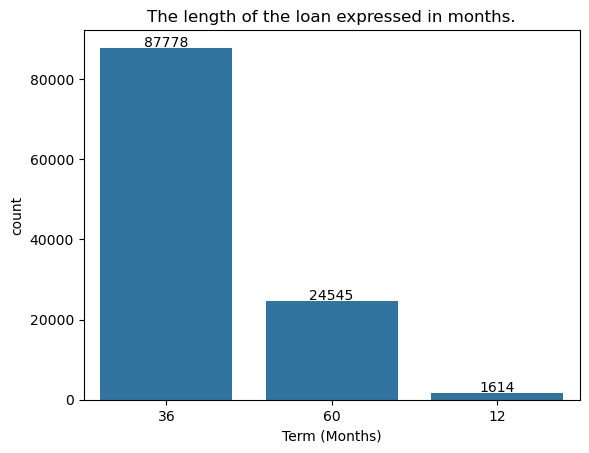

In [12]:
sns.countplot(x='Term',data=df,order=df['Term'].value_counts().index)
plt.xlabel('Term (Months)')

# Adding counts of each term in our data on top of of each bar.
for i in range (df['Term'].value_counts().shape[0]):
    count = df['Term'].value_counts().values[i]
    plt.text(i, count+3000, count, ha = 'center', va='top')
plt.title('The length of the loan expressed in months.');

So, from the above plot we can say that the length of the loan (in months) is maximum for 36 months and minimum for 12 months. We will try to find out why loan term is minimum for 12 months and maximum for 36 months later.


### Let's look at our second variable "Loan Status".

In [13]:
df["LoanStatus"].value_counts()

0    75863
1    38074
Name: LoanStatus, dtype: int64

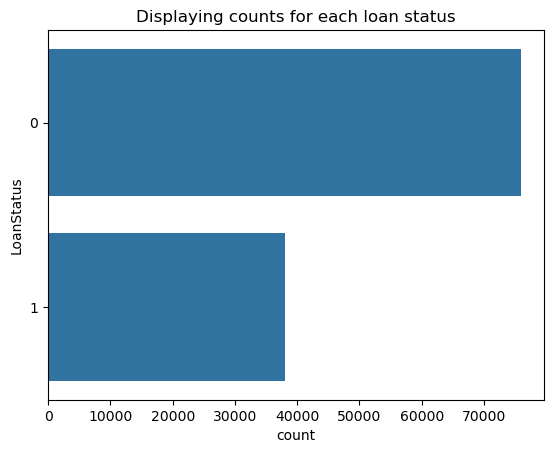

In [14]:
# Countplot.
base_color = sns.color_palette()[0]
sns.countplot(y='LoanStatus',data = df,color=base_color)
plt.title('Displaying counts for each loan status');

### Let's look at our third variable "Borrower APR"

In [15]:
df.columns

Index(['ListingNumber', 'CreditGrade', 'Term', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn',
       ...
       'EmploymentStatus_Not available', 'EmploymentStatus_Not employed',
       'EmploymentStatus_Other', 'EmploymentStatus_Part-time',
       'EmploymentStatus_Retired', 'EmploymentStatus_Self-employed',
       'DateCreditPulledYear', 'DateCreditPulledMonth', 'LoanOriginationYear',
       'LoanOriginationMonth'],
      dtype='object', length=206)

In [16]:
df["BorrowerAPR"].value_counts()

0.35797    6997
0.35643    1644
0.30532     902
0.29510     747
0.35356     721
           ... 
0.25754       1
0.31200       1
0.10346       1
0.15092       1
0.19543       1
Name: BorrowerAPR, Length: 6401, dtype: int64

AttributeError: LineCollection.set() got an unexpected keyword argument 'c'

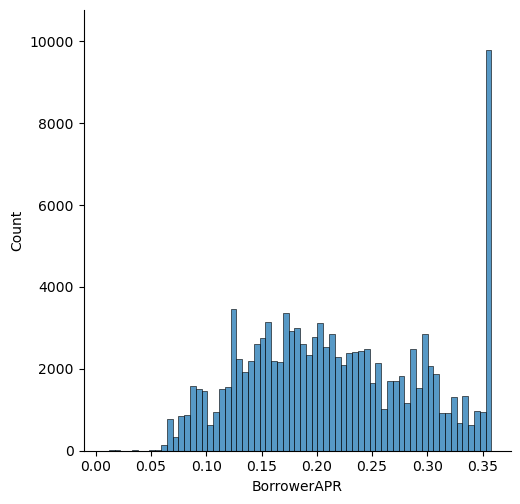

In [17]:
# Plotting displot.
sns.displot(data=df,x='BorrowerAPR',rug=True,rug_kws={'c':'purple'})
plt.title('Distribution of borrower APR');

Count of borrower APR between 0.34 and 0.36 is maximum. This could mean that average percentage rate for many loans is approximately between 0.3 and 0.4 which is very high. And minimum APR is approx. 0.02. There are some high bins between 0.16 and 0.2. There is a fall in count of APR values after 0.2 but again APR increases from 0.26 to 0.3. Than data fall and again their is huge rise in the count of APR.

### Let's look at our fourth variable "Borrower Rate" and try to find hidden pattern in it using histogram.

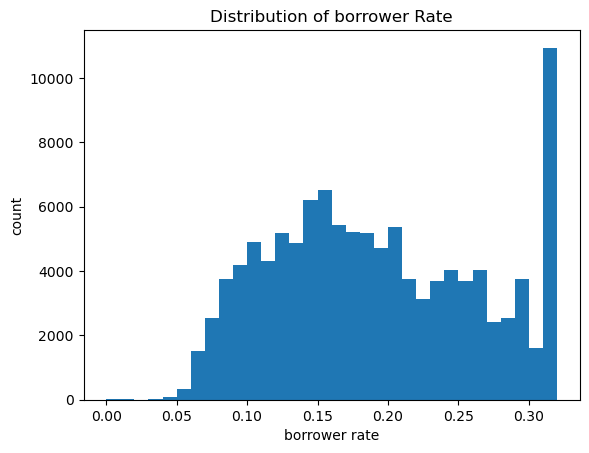

In [18]:
bins = np.arange(0,df['BorrowerRate'].max()+0.01,0.01) 
plt.hist(x='BorrowerRate',data=df,bins=bins)
plt.title('Distribution of borrower Rate')
plt.xlabel('borrower rate')
plt.ylabel('count');

It is a bimodal distribution with one peak lie between 0.15 and 0.17 and another peak lies between 0.30 and 0.33. It is right skewed distribution. After 0.16 rate their is decrease in count but between 0.32 and 0.34 their is sudden increase in the count of borrower rate.

### Let's look at our fifth variable "Listing Category" and try to find hidden pattern in it using histogram.


In [19]:
df.columns

Index(['ListingNumber', 'CreditGrade', 'Term', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn',
       ...
       'EmploymentStatus_Not available', 'EmploymentStatus_Not employed',
       'EmploymentStatus_Other', 'EmploymentStatus_Part-time',
       'EmploymentStatus_Retired', 'EmploymentStatus_Self-employed',
       'DateCreditPulledYear', 'DateCreditPulledMonth', 'LoanOriginationYear',
       'LoanOriginationMonth'],
      dtype='object', length=206)

In [20]:
# Adding one column in our data for listing category names.

# Category names for each numerical value.

list_cat={0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',
 7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',
 13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}

# Running a loop over dataset and dictionary created.

#Appending dictionary values to a list based on keys which are equal to the values present in our listing category.

l=[]
for i in range(df.shape[0]):
    for j in range(len(list_cat)):
        if df['ListingCategory (numeric)'].values[i] == list(list_cat.keys())[j]:
            l.append(list(list_cat.values())[j])

In [21]:
# Assigning a new column with listing labels.
df['ListingLabels'] = l

In [22]:
df.head(5)

,ListingNumber,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,EmploymentStatus_Not employed,EmploymentStatus_Other,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,DateCreditPulledYear,DateCreditPulledMonth,LoanOriginationYear,LoanOriginationMonth,ListingLabels
0,193129,3,36,2009-08-14,0.16516,0.1580,0.1380,0.16150,0.0724,0.09170,...,0,0,0,0,1,2007.0,8.0,2007,9,Not Available
1,1209647,-1,36,2011-04-05,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0,0,0,0,0,2007.0,6.0,2014,3,Home Improvement
2,81716,6,36,2009-12-17,0.28269,0.2750,0.2400,0.16150,0.0724,0.09170,...,0,0,0,0,0,2007.0,1.0,2007,1,Not Available
3,658116,-1,36,2011-04-05,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,0,0,0,0,0,2007.0,6.0,2012,11,Motorcycle
4,909464,-1,36,2011-04-05,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,0,0,0,0,0,2007.0,6.0,2013,9,Home Improvement


In [23]:
df["ListingLabels"].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingLabels, dtype: int64

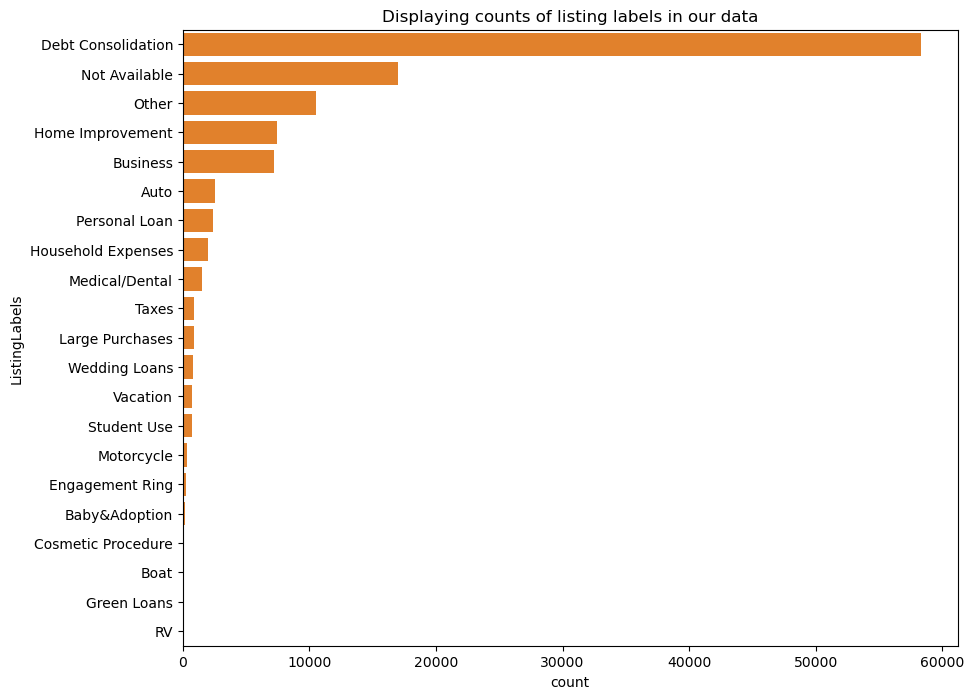

In [24]:
base_color2 = sns.color_palette()[1]
plt.figure(figsize=(10,8))
sns.countplot(y='ListingLabels',data=df,order=df['ListingLabels'].value_counts().index,color=base_color2)
plt.title('Displaying counts of listing labels in our data');

Debt consolidation has the maximum number of counts in our dataset. This means that maximum loans are taken for Debt Consolidation category. This could mean that many borrowers already have existing debts that is why they have taken debt consolidation loan in order to reduce the burden of existing debts and pay some amount for new loan every month at low interest.`

### Let's look at our sixth variable "LoanOriginalAmount".


In [25]:
df['LoanOriginalAmount'].describe()

count    113937.000000
mean       8076.900103
std        5561.564784
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       20000.000000
Name: LoanOriginalAmount, dtype: float64

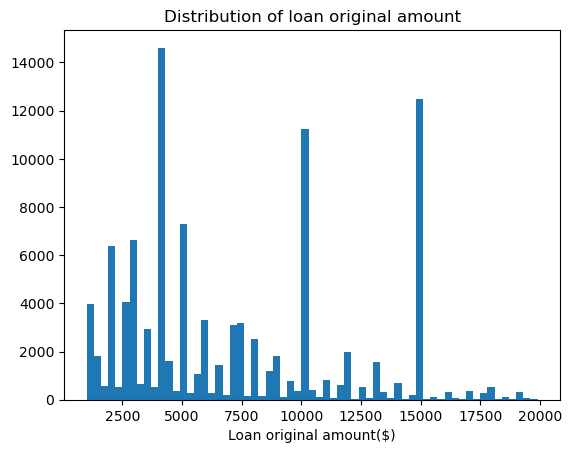

In [26]:
# Plotting histogram.
bins = np.arange(1000,df['LoanOriginalAmount'].max()+40,300)
plt.hist(x='LoanOriginalAmount',data=df,bins=bins)
plt.title('Distribution of loan original amount')
plt.xlabel('Loan original amount($)');

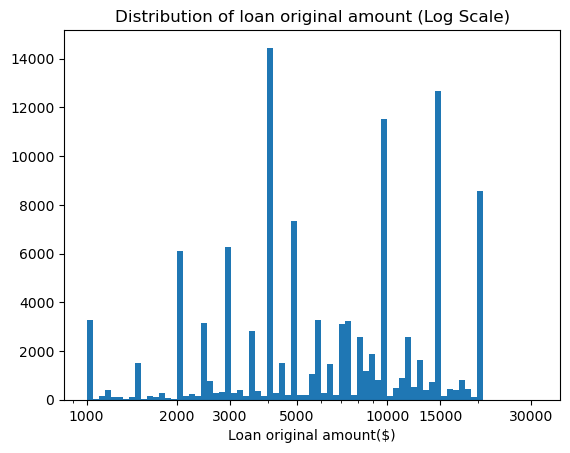

In [27]:

# Again plotting histogram but with log transgormation.
bins = 10** np.arange(3,4.5+0.01,0.02)
tick = [1000,2000,3000,5000,10000,15000,30000]
labels=['{}'.format(x)for x in tick]
plt.hist(x='LoanOriginalAmount',data=df,bins=bins)
plt.xscale('log')
plt.xticks(tick,labels)
plt.title('Distribution of loan original amount (Log Scale)')
plt.xlabel('Loan original amount($)');



First of all, data is right skewed.
Secondly, from descriptive statistics we can see that minimum loan original amount is 1000 whereas maximum loan original amount is 35000.
Third, from displot we can see that density of data points is highest between approx. 1000 and 8000. This means that the loan original amount taken by the maximum number of borrowers ranges from approx. 1000 to 8000.


### Let's look at our seventh variable "DebtToIncomeRatio" and try to find hidden pattern in it using plots.


In [28]:
df['DebtToIncomeRatio'].describe()


count    113937.000000
mean          0.271746
std           0.530847
min           0.000000
25%           0.150000
50%           0.220000
75%           0.310000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

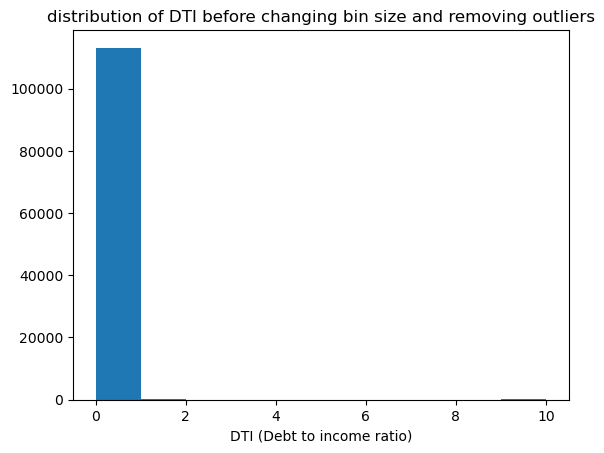

In [29]:
# Plotting histogram
plt.hist(x='DebtToIncomeRatio',data=df)
plt.title('distribution of DTI before changing bin size and removing outliers')
plt.xlabel('DTI (Debt to income ratio)');

Most of our data falls between 0 and 1. Also, their are some points greater than 1 between 1 and 2, 9 and 10. So, I think these are outliers because highest debttoincome ratio is approx. 50%.


In [30]:
# Select outliers in debt to income ratio with ratio greater than 1.
outliers_dti = (df['DebtToIncomeRatio']>1)
out_df = df.loc[outliers_dti,:]
#Removing outlier from our data.
filter_df = df.loc[-outliers_dti,:]
filter_df.head()


,ListingNumber,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,EmploymentStatus_Not employed,EmploymentStatus_Other,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,DateCreditPulledYear,DateCreditPulledMonth,LoanOriginationYear,LoanOriginationMonth,ListingLabels
0,193129,3,36,2009-08-14,0.16516,0.1580,0.1380,0.16150,0.0724,0.09170,...,0,0,0,0,1,2007.0,8.0,2007,9,Not Available
1,1209647,-1,36,2011-04-05,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0,0,0,0,0,2007.0,6.0,2014,3,Home Improvement
2,81716,6,36,2009-12-17,0.28269,0.2750,0.2400,0.16150,0.0724,0.09170,...,0,0,0,0,0,2007.0,1.0,2007,1,Not Available
3,658116,-1,36,2011-04-05,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,0,0,0,0,0,2007.0,6.0,2012,11,Motorcycle
4,909464,-1,36,2011-04-05,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,0,0,0,0,0,2007.0,6.0,2013,9,Home Improvement


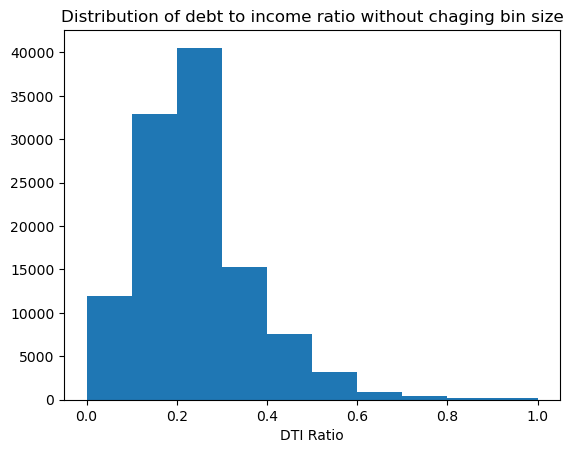

In [31]:
# Plotting histogram after removal of outliers.
plt.hist(x='DebtToIncomeRatio',data=filter_df)
plt.xlabel('DTI Ratio')
plt.title('Distribution of debt to income ratio without chaging bin size');


DTI Ratio is unimodal but distribution is slightly right skewed. Let's look at the data more closely to see if it holds interesting pattern.


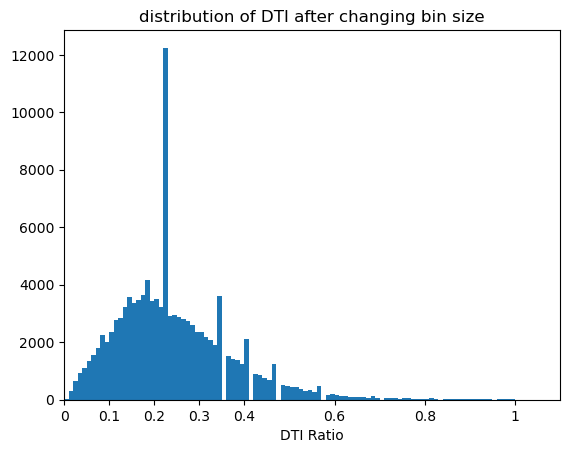

In [32]:

# Plotting a histogram with more number of bins.
bins = np.arange(0,1+0.01,0.01)
tick = [0,0.1,0.2,0.3,0.4,0.6,0.8,1]
labels = ['{}'.format(v)for v in tick]
plt.hist(x='DebtToIncomeRatio',data=filter_df,bins=bins)
plt.xlabel('DTI Ratio')
#plt.xscale('log');
plt.xticks(np.array(tick),labels)
plt.xlim(0,1.1)
plt.title('distribution of DTI after changing bin size');


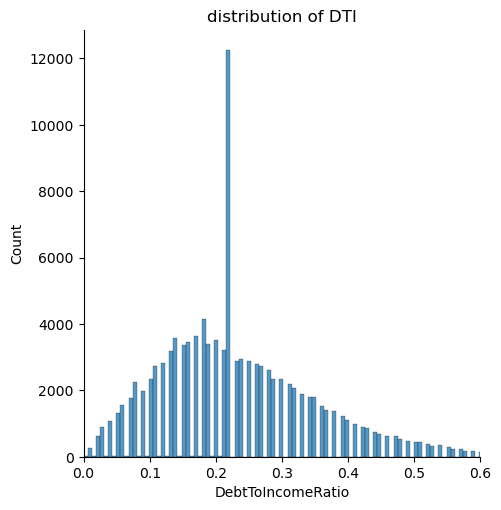

In [33]:
# Plotting displot just to check the distribution of DTI.
sns.displot(x='DebtToIncomeRatio',data=filter_df,kind='hist',rug_kws={'c':'red'})
plt.xlim(0,0.6)
plt.title('distribution of DTI');


Maximum DTI seems to lie between 0.15 and 0.2 which is quite good DTI. After 0.2 (between 0.22 and 0.25 their is an increase in counts of DTI ratio) count of DTI decreases with a smooth slope.

Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? 

In debt to income variable, their were some points which were greater than 1. So, I considered them as outliers because when I did some research about minimum and maximum DTI, I found that maximum DTI can reach upto 50% or 0.5. So, it is very unlikely that DTI would be greater than 1.

I performed some transformation on Debt to income ratio variable, Loan original amount variable, and borrower rate.
I did log transformation on stated monthly income. Data was highly right skewed before transformation but after doing transformation I observed that most of the data points are between 2k to 10k approx..

Of the features I investigated, were there any unusual distributions? 

I did some transformation on Debt to income ratio variable, Loan original amount variable, and borrower rate.
These transformations include:
* 1- Changing X-ticks to view more exact point of interest.
* 2- Changing bins size to reduce noise in the graph and view data more precisely.
* 3- Using log xscale to make interpretations from the graph easy.



## Bivariate Exploration

In [34]:
loan_df = filter_df.reset_index()

In [35]:
loan_df=loan_df.drop('index',axis=1)

In [36]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113138 entries, 0 to 113137
Columns: 207 entries, ListingNumber to ListingLabels
dtypes: float64(59), int64(143), object(5)
memory usage: 178.7+ MB


In [37]:
numeric_var=loan_df.select_dtypes(include=np.number).columns.tolist()

In [38]:
numeric_var

['ListingNumber',
 'CreditGrade',
 'Term',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'IncomeRange',
 'IncomeVerifiable',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'TotalProsperPaymentsBill

#### I have commented the code because it is taking alot of time to get plotted so, I have commented.

In [39]:
# # Plotting a heat map to show the correlation of each numerical variable.
# plt.figure(figsize=(15,15))
# sns.heatmap(data=loan_df[numeric_var].corr(),annot=True,fmt='.3f')
# plt.title('Correlation of numerical variable using heat map');

In [40]:
# # plot matrix: sample 500 loans so that plots are clearer.
# samples = np.random.choice(loan_df.shape[0], 10000, replace = False)
# loan_samp = loan_df.loc[samples,:]
# pg = sns.PairGrid(data = loan_samp, vars = numeric_var,height=2)
# pg = pg.map_diag(plt.hist, bins = 20)
# pg.map_offdiag(plt.scatter,alpha=1/6)
# pg.fig.suptitle('Displaying how numerical features are related with each other using pairgrid',y=1.02);


From the above two graphs, I have concluded several points:
* 1- Borrower APR is highly correlated with Borrower Rate.
* 2- If borrower rate increases borrower APR will also increase and vice-versa.
* 3- There is a moderate correlation between investors and Loan original amount.
* 4- It is strange that debt to income ratio is very low correlated with every other variable. It could be due to not including large number of features from main dataframe 'df'. But I will try to explore this feature with categorical variables. Also, if we look at the DTI (debt to income ratio) graph (pairplot) and compare it with the graphs of borrower APR and borrower Rate, we can observe that their is some correlation between these variables.
* 5- Their seem to be some outliers present in credit score range upper and credit score range lower variables. I will remove them and than again plot the pairgrid to see the correlation.
* 6- Their is moderate negative correlation between loan original amount and Borrower APR, Borrower Rate variables.

#### Removing outliers from credit score range upper and credit score range lower variables with values below 300.

In [41]:
# Selecting outliers with credit score range for both, lower and upper, less than 300.
outlier_data = (loan_df['CreditScoreRangeLower']<300) | (loan_df['CreditScoreRangeUpper']<300)

In [42]:
# Removing outliers from data.
loan_df=loan_df.loc[-outlier_data,:]

In [43]:
loan_df = loan_df.reset_index()

In [44]:
# # Plotting heat map without outliers in our dataset.
# plt.figure(figsize=(20,20))
# sns.heatmap(data=loan_df[numeric_var].corr(),annot=True,fmt='.3f')
# plt.title('Correlation of numerical variables.');

In [45]:
# # plot matrix: sample 500 loans so that plots are clearer.
# samples = np.random.choice(loan_df.shape[0], 10000, replace = False)
# loan_samp = loan_df.loc[samples,:]
# pg = sns.PairGrid(data = loan_samp, vars = numeric_var,height=2)
# pg = pg.map_diag(plt.hist, bins = 20)
# pg.map_offdiag(plt.scatter,alpha=1/6)
# pg.fig.suptitle('Displaying how numerical features are related with each other using pairgrid',y=1.02);

After removing outliers, I have concluded several points:
* 1- We can see the moderate negative correlation between investors and Borrower APR, Rate variable more clearly.
* 2- Also, we can see the moderate negative correlation of credit score lower and upper range with both Borrower APR, Rate variables more clearly.
* 3- We can clearly see the moderate positive correlation between loan original amount and Credit score lower and upper.
* 4- Debt to income ratio is moderately negatively correlated with stated monthly income.

* Exceptional: 800 to 850. FICO® Scores ranging from 800 to 850 are considered exceptional. ...
* Very good: 740 to 799. FICO® Scores in the 740 to 799 range are deemed very good. ...
* Good: 670 to 739. FICO® Scores in the range of 670 to 739 are rated good. ...
* Fair: 580 to 669. ...
* Poor: 300 to 579.

In [46]:
# Converting credit score range from numerical dataype to categorical data type.

cs = np.array(loan_df['CreditScoreRangeLower'])

# Dictionary of class (key) associated with its range of credit score (value).

d = {'Exceptional':np.arange(800,881,1),'Very Good':np.arange(740,800,1),'Good':np.arange(670,740,1),'Fair':np.arange(580,670,1),'Poor':np.arange(300,580,1)}
l=[]
ns=[]
for i in range(cs.shape[0]):
    for key,val in d.items():
        if cs[i] in val:
            l.append(key)
loan_df=loan_df.assign(credit_score_class=l)

# Convertin dataype to categorical.

credit_class=['Poor','Fair','Good','Very Good','Exceptional']
t=pd.api.types.CategoricalDtype(categories=credit_class,ordered=True)
loan_df['credit_score_class']=loan_df['credit_score_class'].astype(t)

### Let's take a look at 'Borrower APR' and 'credit score class' variable

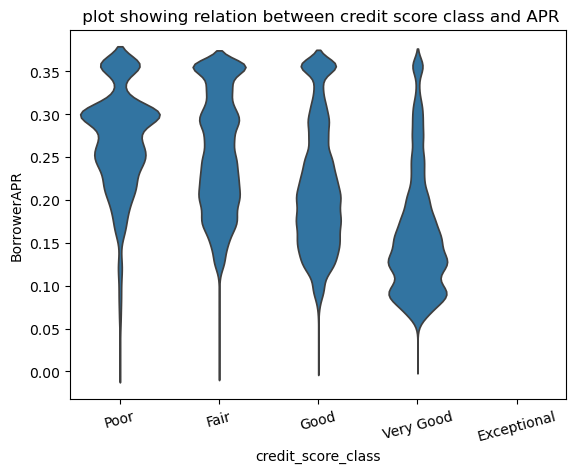

In [47]:
# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
base_c=sns.color_palette()[0]
sns.violinplot(data=loan_df, x='credit_score_class', y='BorrowerAPR', color=base_c, inner=None)
plt.xticks(rotation=15)
plt.title(' plot showing relation between credit score class and APR');

### Let's take a look at 'Borrower APR' and 'loan status' variable.

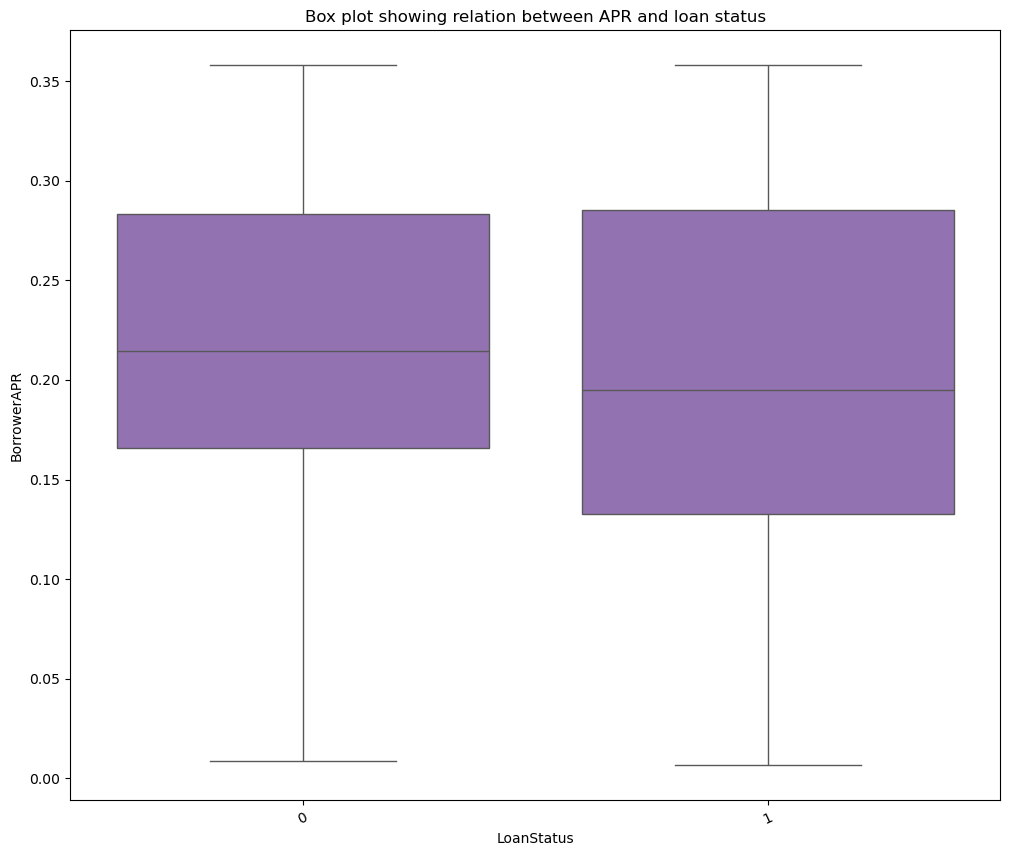

In [48]:

# Plotting boxplot.
plt.figure(figsize=(12,10))
base_c = sns.color_palette()[4]
sns.boxplot(x='LoanStatus',y='BorrowerAPR',data=loan_df,color=base_c)
plt.xticks(rotation=25)
plt.title('Box plot showing relation between APR and loan status');


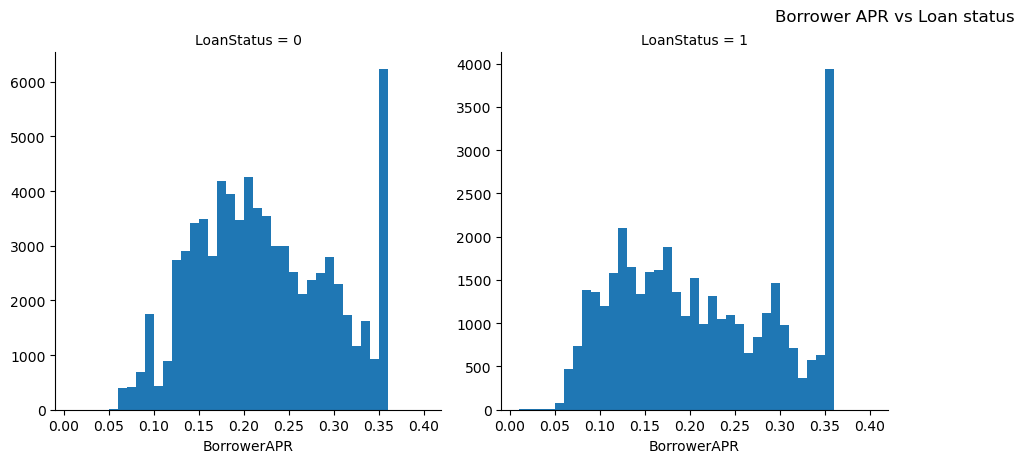

In [49]:

# Plotting histogram with seaborn's facetgrid function.
bins = np.arange(0.01,0.4+0.01,0.01)
f=sns.FacetGrid(data=loan_df,col='LoanStatus',col_wrap=4,sharey=False,sharex=False,height=4.5)
f.map(plt.hist,'BorrowerAPR',bins=bins)
f.fig.suptitle('Borrower APR vs Loan status',y=1.02);

Text(0.5, 1.0, 'Point plot showing relation between loan status and APR')

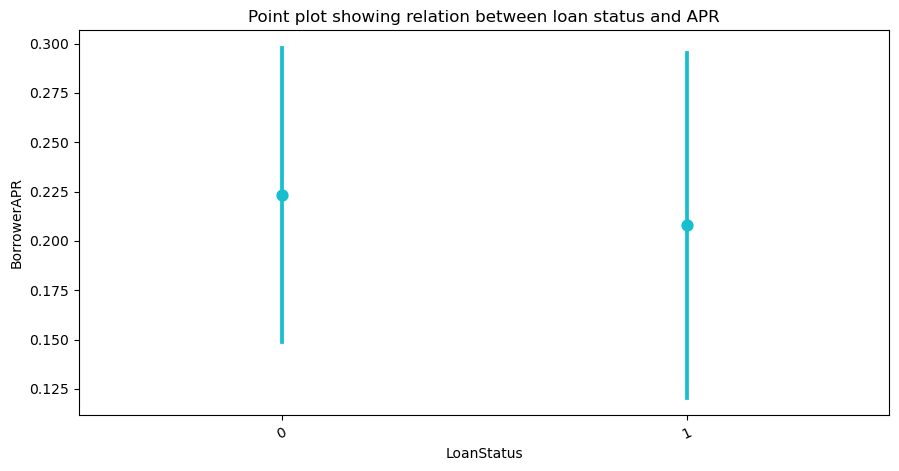

In [50]:
# Plotting pointplot
plt.figure(figsize=(23,5))
plt.subplot(1,2,1)
base_c=sns.color_palette()[9]
base_c2=sns.color_palette()[8]
sns.pointplot(data=loan_df,x='LoanStatus',y='BorrowerAPR',join=False,ci='sd',color=base_c)
plt.xticks(rotation=25)
plt.title('Point plot showing relation between loan status and APR')

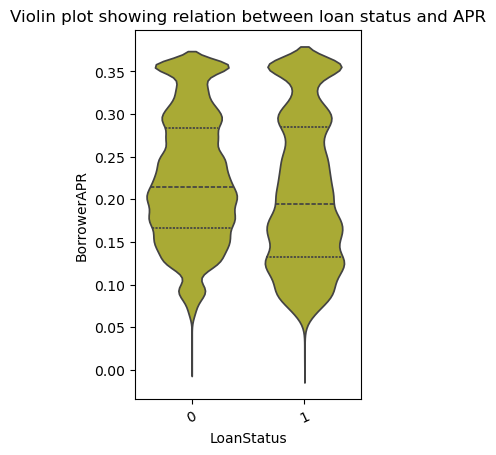

In [51]:
# plotting violin plot.
plt.subplot(1,2,2)
sns.violinplot(data=loan_df,x='LoanStatus',y='BorrowerAPR',inner='quartile',color=base_c2)
plt.xticks(rotation=25)
plt.title('Violin plot showing relation between loan status and APR');


### Let's take a look at 'Borrower APR' and 'Borrower Rate' variable.

In [52]:
for lab in ['BorrowerAPR','BorrowerRate']:
    bins = np.arange(0,loan_df[lab].max()+0.04,0.04)
    bins = [round(x,2) for x in bins]
    loan_df[f'{lab} cat'] = pd.cut(x=loan_df[lab],bins=bins,labels=bins[1:],include_lowest=False)



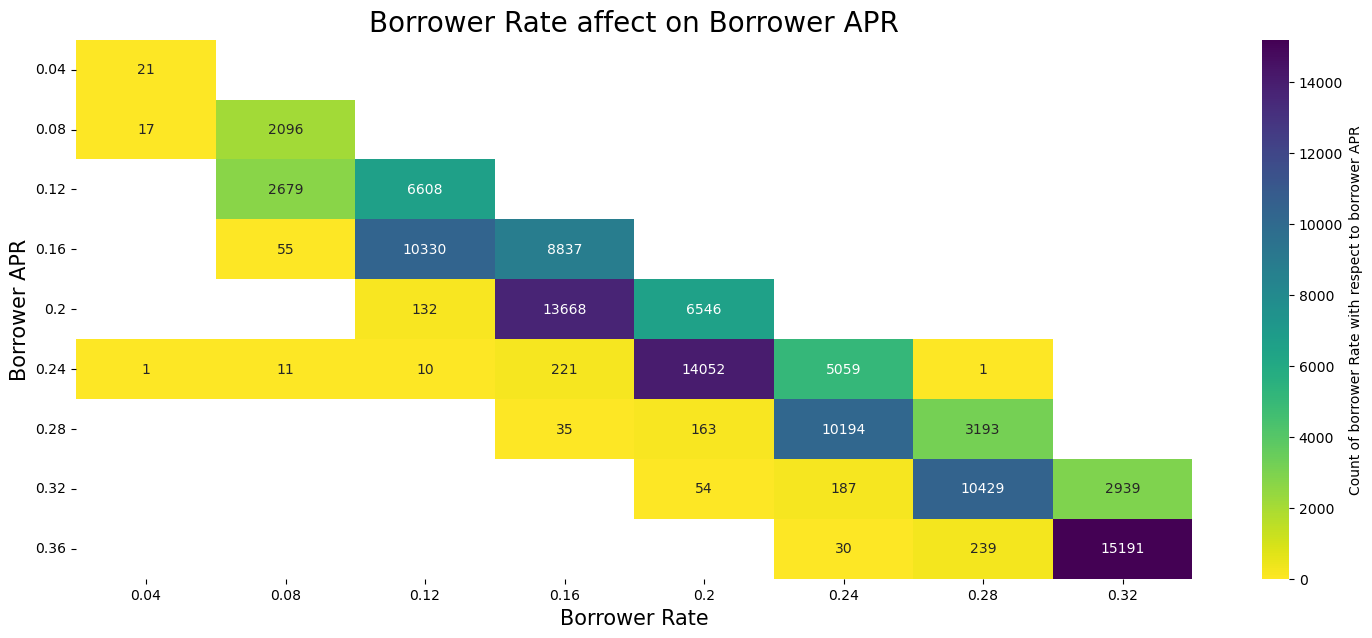

In [53]:
plt.figure(figsize=(18, 7))
sns.heatmap(loan_df.groupby(['BorrowerAPR cat','BorrowerRate cat']).size().unstack('BorrowerRate cat').replace({0:np.nan}),annot=True,
           fmt='.0f',cmap='viridis_r',vmin=0,cbar_kws={'label':'Count of borrower Rate with respect to borrower APR'})
plt.title('Borrower Rate affect on Borrower APR',fontdict={'size':20})
plt.xlabel('Borrower Rate',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15})
plt.yticks(rotation=0)
plt.show();


From above heat map I have made several observations:

Borrower Rate is highly proportional with borrower APR. This means that if we increase Borrower APR than Borrower Rate will also increase and vice-versa.
Maximum borrowers have APR and Rate between 0.1 and 0.2.(see dark portion)
Between 0.05 and 0.2, count of borrower APR and borrower Rate increases. Between 0.2 and 0.35 count of borrower APR and rate decreases.


### Let's take a look at 'Borrower APR' and 'Loan Term' quantitative variables.



<Figure size 1600x800 with 0 Axes>

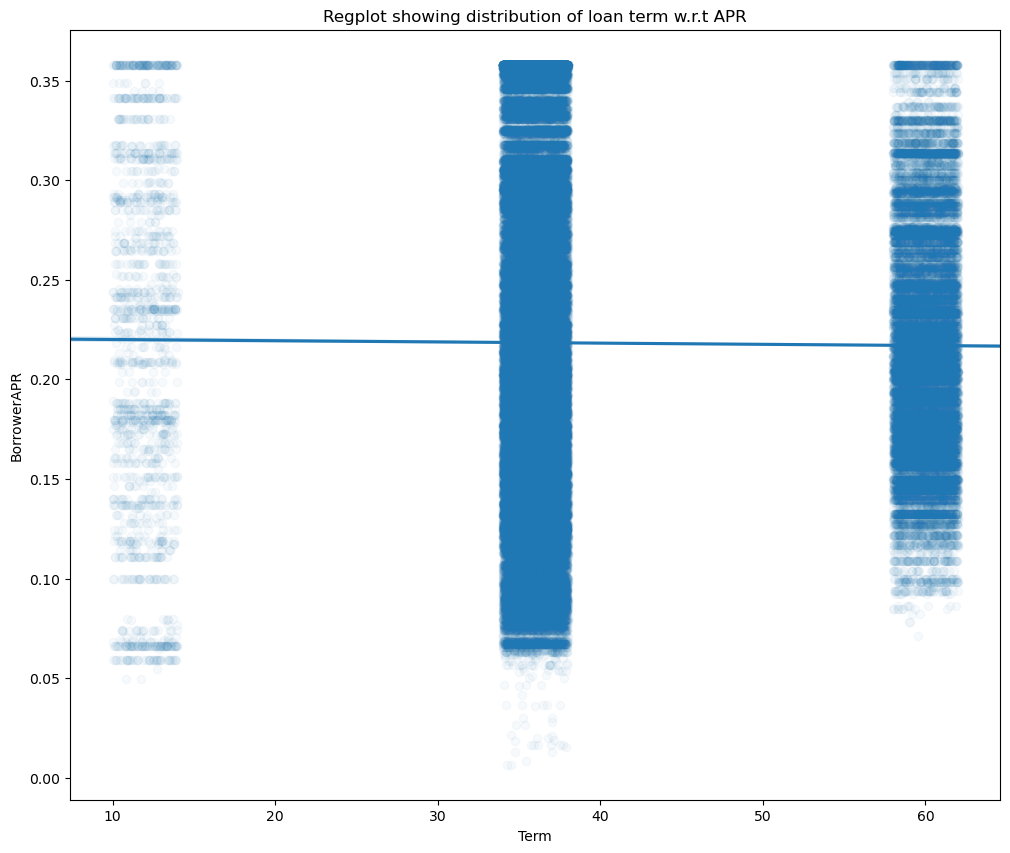

<Figure size 1600x800 with 0 Axes>

In [54]:

# Plotting regplot.
plt.figure(figsize=(12,10))
sns.regplot(data = loan_df, x = 'Term', y = 'BorrowerAPR', truncate=False, x_jitter=2,scatter_kws={'alpha':1/30})
plt.title('Regplot showing distribution of loan term w.r.t APR');

plt.figure(figsize=(16,8))

Text(0.5, 1.0, 'Term vs Borrower APR (Boxplot)')

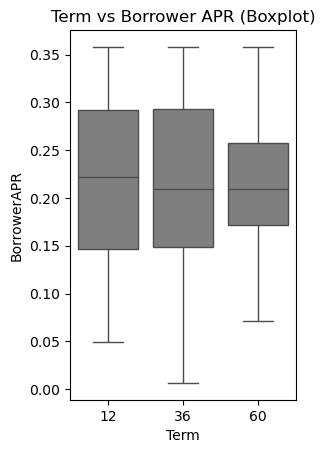

In [55]:

# Plotting boxplot.
plt.subplot(1,2,1)
base_c=sns.color_palette()[9]
base_c2=sns.color_palette()[7]
sns.boxplot(x='Term',y='BorrowerAPR',data=loan_df,color=base_c2)
plt.title('Term vs Borrower APR (Boxplot)')

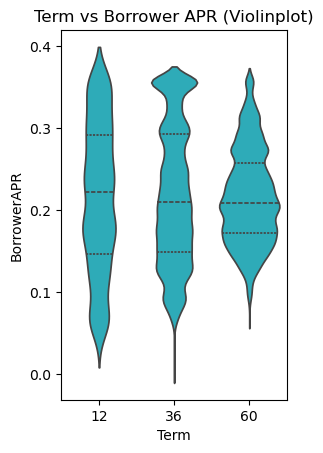

In [56]:

# Plotting violinplot.
plt.subplot(1,2,2)
sns.violinplot(x='Term',y='BorrowerAPR',data=loan_df,color=base_c,inner='quartile')
plt.title('Term vs Borrower APR (Violinplot)');



I have made several observations from above three plots:

Maximum number of borrowers took loan for 36 months.
Also, count of borrower APR is maximum at 36 months because of first observation.
Using box plot I observed that at 36 month distribution of Borrower APR is slightly left skewed.
Also, median falls at 0.2 approx which is close to first quartile. This could mean that maximum borrowers who took loan for 36 months had APR between 0.16 and 0.2 approx. which is quite good compare to other borrowers APR which falls between 0.21 and 0.3 approx.
Minimum APR is 0.01 approx. at 36 month term which is a good sign.
Maximum APR is above 0.4 at 36 month term which is considered as bad news.



### Let's take a look at 'Borrower APR' and 'Loan original amount' quantitative variables.


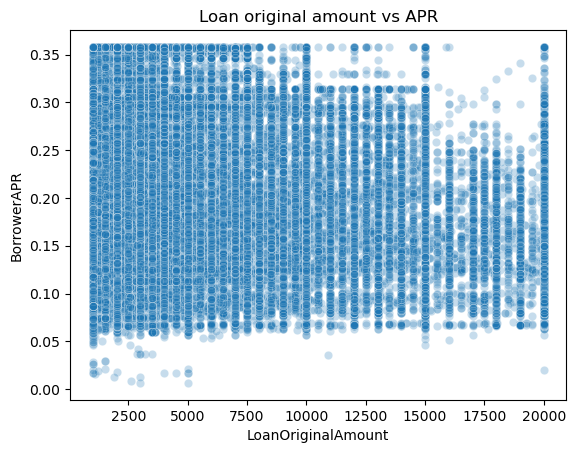

In [57]:

# Plotting scatter plot.
sns.scatterplot(x='LoanOriginalAmount',y='BorrowerAPR',data=loan_df,alpha=1/4)
plt.title('Loan original amount vs APR');


From above scatter plot, although, we can see that their is a gradual decrease in Borrower APR with loan amount still it does not give a clear picture of count of APR between a given range of loan amount.
Let's try to plot a heat map.

_Let's add annotations and transform x-axis and y-axis bins to get more accurate data representation.__


### Let's explore 'credit class' and 'loan status'.


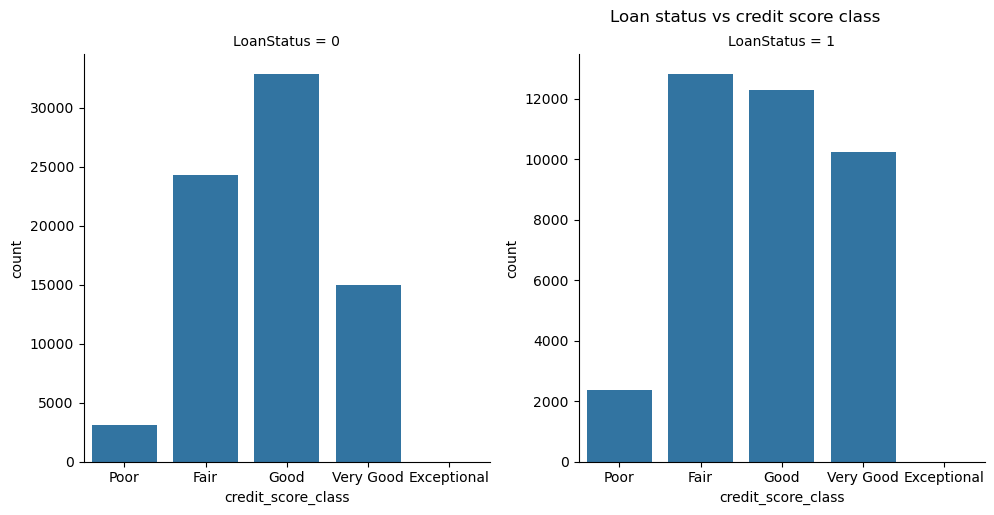

In [58]:
# Plotting countplot using seaborn's facetgrid.
ls=sns.FacetGrid(data=loan_df,col='LoanStatus',col_wrap=3,height=5,sharey=False,sharex=False)
ls.map(sns.countplot,'credit_score_class',order=['Poor','Fair','Good','Very Good','Exceptional'])
ls.fig.suptitle('Loan status vs credit score class',y=1.02);


From above facet plot I have made some observations:

* For loan status 'Default' most of the borrowers have either fair or poor credit score.
* Apart from this I can not make much interpretations because their could be other features which show some kind of relationship with these two categorical variables. Right now it is difficult to say anything about how credit score class influence loan status. I will try to find the relationship between these features using multivariate analysis.



### Let's explore 'Borrower APR' and 'Debt To Income Ratio'.


In [59]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bins_edges = np.arange(0,1+0.1,0.01)
bins_center = bins_edges[:-1]+0.0025
# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(loan_df['DebtToIncomeRatio'], bins_edges, include_lowest = True)
displ_binned

0         (0.16, 0.17]
1         (0.17, 0.18]
2         (0.05, 0.06]
3         (0.14, 0.15]
4         (0.25, 0.26]
              ...     
113001    (0.12, 0.13]
113002     (0.1, 0.11]
113003     (0.5, 0.51]
113004    (0.47, 0.48]
113005    (0.22, 0.23]
Name: DebtToIncomeRatio, Length: 113006, dtype: category
Categories (109, interval[float64, right]): [(-0.001, 0.01] < (0.01, 0.02] < (0.02, 0.03] < (0.03, 0.04] ... (1.05, 1.06] < (1.06, 1.07] < (1.07, 1.08] < (1.08, 1.09]]

How did the feature(s) of interest vary with other features in the dataset?
* Borrower APR was high for less loan original amount and low for high loan amount. Also, Borrower APR and debt to income ratio although tend to go up, had weak correlation whereas borrower APR was weaky negative correlated with monthly income.

## Multivariate Exploration

Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

### Let's explore 'Loan Status' with 'Borrower APR' and 'Borrower Rate'

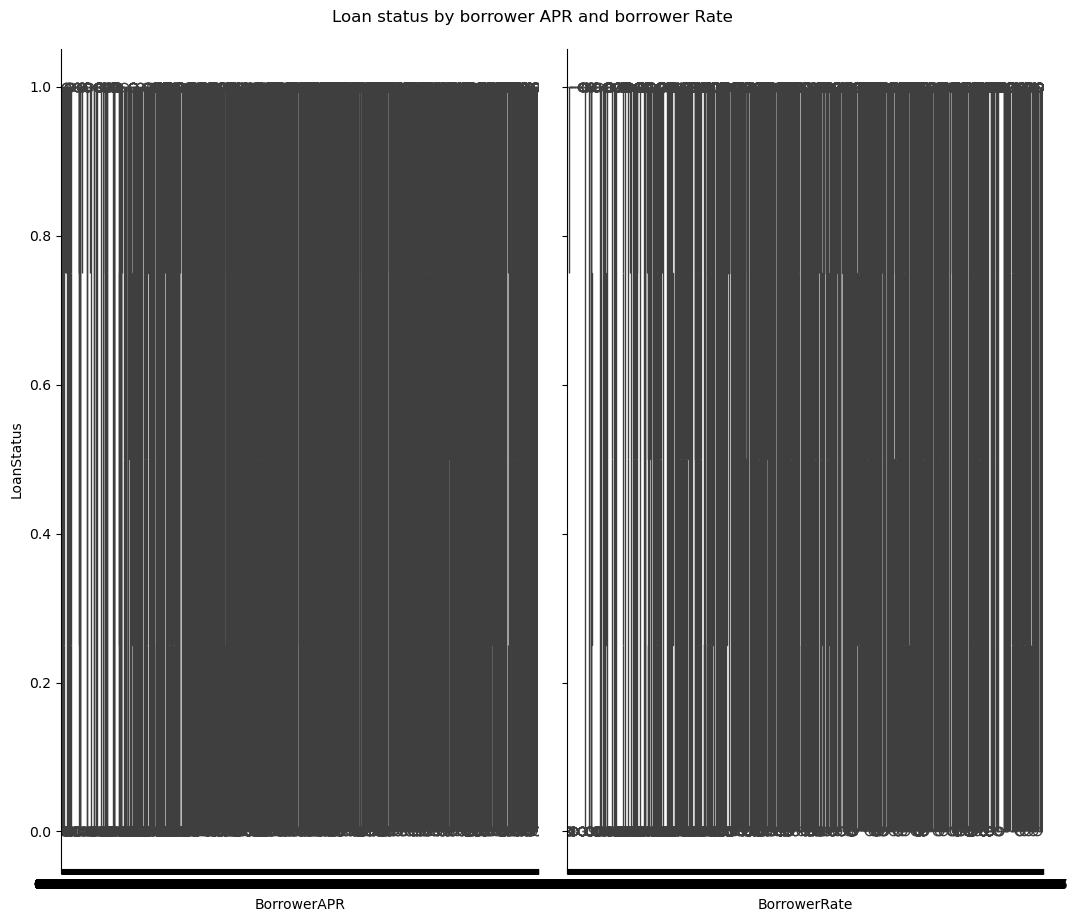

In [60]:
# Plotting boxplot using seaborn's facetgrid.
g = sns.PairGrid(data = loan_df, x_vars = ['BorrowerAPR', 'BorrowerRate'],
                y_vars = 'LoanStatus',height=9,aspect=0.6)
g.map(sns.boxplot)
g.fig.suptitle('Loan status by borrower APR and borrower Rate',y=1.02);

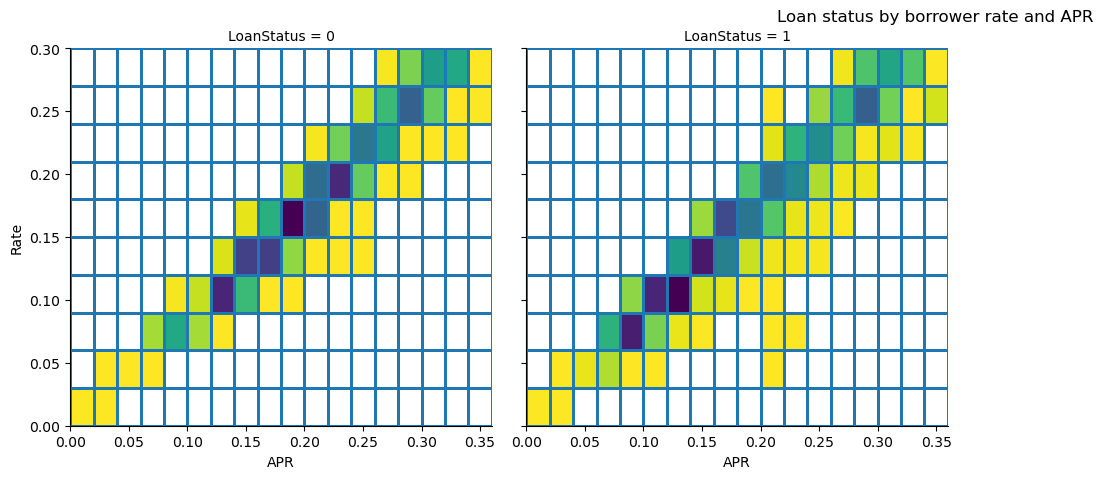

In [61]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,loan_df['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,loan_df['BorrowerRate'].max()+0.01,0.03)
g = sns.FacetGrid(data = loan_df, col = 'LoanStatus', col_wrap = 4, height = 4.7)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Loan status by borrower rate and APR',y=1.01)

plt.show()

From above histogram 2d I have made several observations: 1- Out of all loan status, 'completed' and 'current' status are the only ones with maximum count of APR and rate less than or equal to 0.2.
2- Rest of the loan status have a 'cloud' of points above 0.2 for both APR and Rate except 'cancelled' status as it has only one record in our data. 3- If borrower APR and rate are high than loan status is more likely to be anything except 'current' and 'completed'

### Let's explore 'loan status' , 'Loan Term',loan amount' and 'debt to income ratio

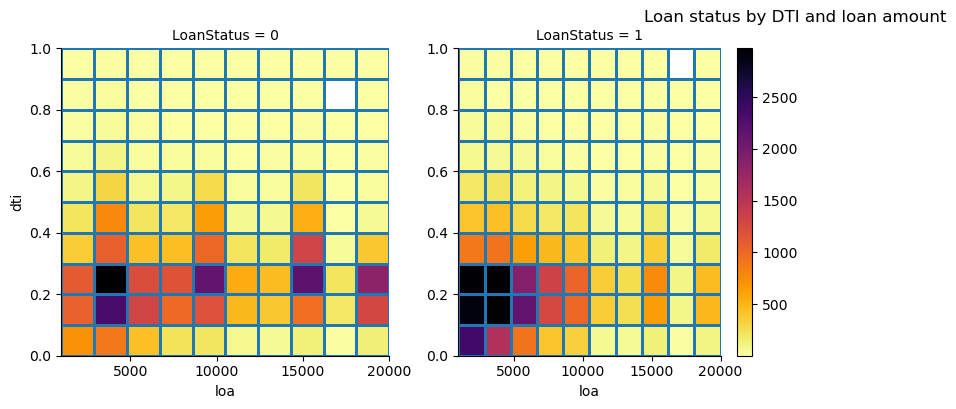

In [62]:
#bins_x = np.arange(1000,np.log10(loan_df['LoanOriginalAmount'].max())+0.01,0.2)
#bins_y = 10**(np.arange(0,loan_df['DebtToIncomeRatio'].max()+0.1,0.1))
# Plotting heatmap using seavorn's facetgrid
g = sns.FacetGrid(data = loan_df, col = 'LoanStatus', col_wrap = 4, height = 4,sharex=False,sharey=False)
g.map(plt.hist2d, 'LoanOriginalAmount', 'DebtToIncomeRatio',cmap = 'inferno_r',cmin=0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by DTI and loan amount',y=1.01)
plt.colorbar()
plt.show()

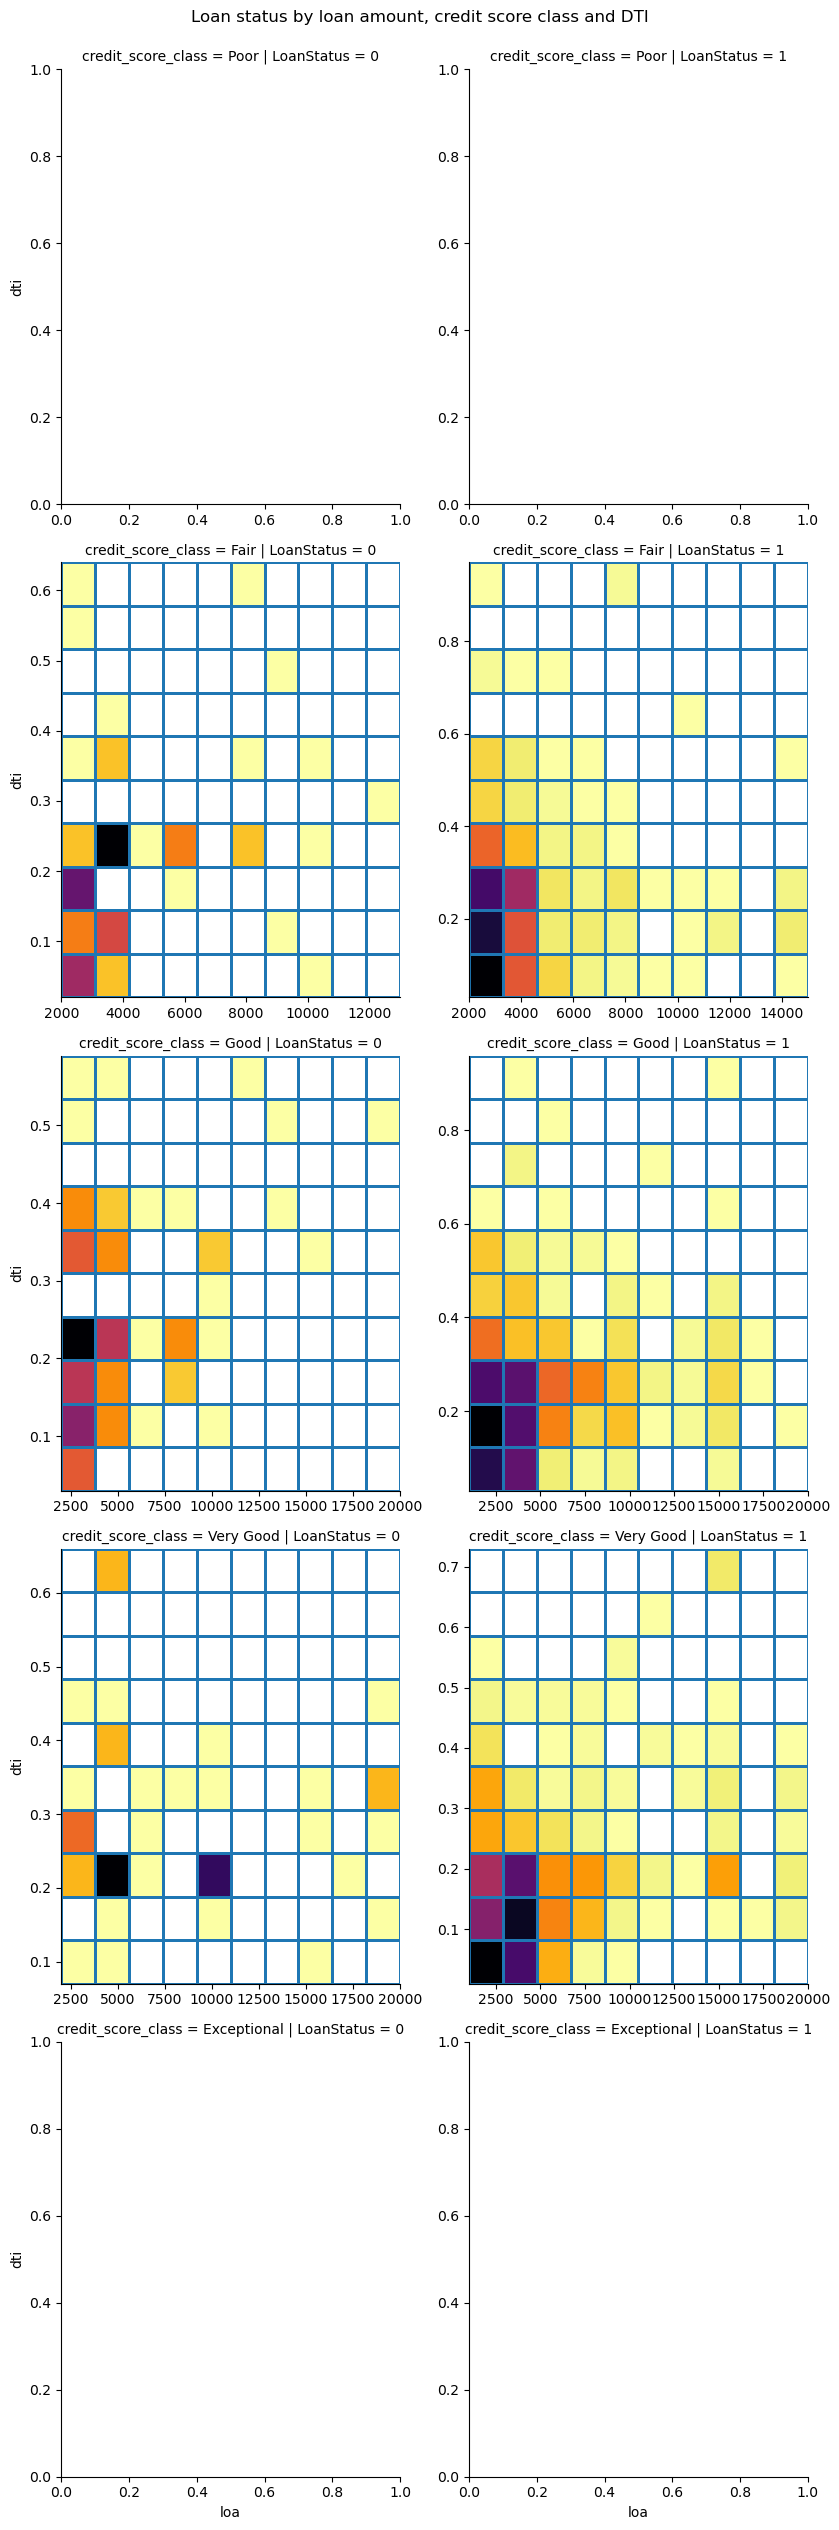

In [63]:
# Plotting heatmap for 'Term' = 12.
term12 = loan_df[loan_df['Term'] == 12]
#bins_x = np.arange(1000,term12['LoanOriginalAmount'].max()+0.01,0.05)
#bins_y = np.arange(0,term12['DebtToIncomeRatio'].max()+0.01,0.05)
g = sns.FacetGrid(data = term12, col = 'LoanStatus',row='credit_score_class', sharex=False,sharey=False,height = 5,aspect=0.85)
g.map(plt.hist2d,'LoanOriginalAmount','DebtToIncomeRatio',cmap='inferno_r',cmin=0.5)
g.set_xlabels('loa')
g.set_ylabels('dti')
g.fig.suptitle('Loan status by loan amount, credit score class and DTI',y=1.01)
#g.set(xlim=(1000, 37000), ylim=(0, 1.3), xticks=[1000, 5000, 10000,15000,20000,25000,30000,350000], yticks=[0, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.show()